# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | changji
Processing Record 7 of Set 1 | lukulu
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | avallon
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | provideniya
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | lagoa
Processing Record 18 of Set 1 | sisimiut
Processing Record 19 of Set 1 | severo-kurilsk
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | codrington

Processing Record 38 of Set 4 | pisco
Processing Record 39 of Set 4 | coquimbo
Processing Record 40 of Set 4 | churapcha
Processing Record 41 of Set 4 | ruston
Processing Record 42 of Set 4 | petauke
Processing Record 43 of Set 4 | upernavik
Processing Record 44 of Set 4 | tonj
Processing Record 45 of Set 4 | lazarev
Processing Record 46 of Set 4 | sheltozero
Processing Record 47 of Set 4 | karasjok
Processing Record 48 of Set 4 | udachnyy
Processing Record 49 of Set 4 | sivaki
Processing Record 0 of Set 5 | yar-sale
Processing Record 1 of Set 5 | severnoye
Processing Record 2 of Set 5 | katsuura
Processing Record 3 of Set 5 | aklavik
Processing Record 4 of Set 5 | carnarvon
Processing Record 5 of Set 5 | marzuq
Processing Record 6 of Set 5 | sao joao da barra
Processing Record 7 of Set 5 | vila velha
Processing Record 8 of Set 5 | ballina
Processing Record 9 of Set 5 | lavrentiya
Processing Record 10 of Set 5 | zurrieq
Processing Record 11 of Set 5 | balimo
City not found. Skipping...

Processing Record 25 of Set 8 | caxito
Processing Record 26 of Set 8 | inirida
Processing Record 27 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 28 of Set 8 | lompoc
Processing Record 29 of Set 8 | kemin
Processing Record 30 of Set 8 | huarmey
Processing Record 31 of Set 8 | thunder bay
Processing Record 32 of Set 8 | palakkad
Processing Record 33 of Set 8 | dauriya
Processing Record 34 of Set 8 | eyl
Processing Record 35 of Set 8 | marigot
Processing Record 36 of Set 8 | poya
Processing Record 37 of Set 8 | mananjary
Processing Record 38 of Set 8 | sussex
Processing Record 39 of Set 8 | saldanha
Processing Record 40 of Set 8 | bathsheba
Processing Record 41 of Set 8 | kiunga
Processing Record 42 of Set 8 | kanniyakumari
Processing Record 43 of Set 8 | snasa
Processing Record 44 of Set 8 | susangerd
Processing Record 45 of Set 8 | zhitikara
City not found. Skipping...
Processing Record 46 of Set 8 | muros
Processing Record 47 of Set 8 | silver city
Processing Record

Processing Record 13 of Set 12 | deer lake
Processing Record 14 of Set 12 | flagstaff
Processing Record 15 of Set 12 | yanchukan
City not found. Skipping...
Processing Record 16 of Set 12 | kerki
City not found. Skipping...
Processing Record 17 of Set 12 | saint george
Processing Record 18 of Set 12 | mushie
Processing Record 19 of Set 12 | bushehr
Processing Record 20 of Set 12 | rocky mountain house
Processing Record 21 of Set 12 | sur
Processing Record 22 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 23 of Set 12 | malgobek
Processing Record 24 of Set 12 | seminole
Processing Record 25 of Set 12 | majdanpek
Processing Record 26 of Set 12 | aksarka
Processing Record 27 of Set 12 | krasnovishersk
Processing Record 28 of Set 12 | asosa
Processing Record 29 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 30 of Set 12 | los banos
Processing Record 31 of Set 12 | chistogorskiy
Processing Record 32 of Set 12 | bensonville
Processing Record 33 of Set 12 | nouad

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.8794,147.3294,13.48,65,75,5.14,AU,1670279408
1,tasiilaq,65.6145,-37.6368,-3.91,62,24,2.20,GL,1670279624
2,bredasdorp,-34.5322,20.0403,14.09,70,100,0.86,ZA,1670279625
3,rikitea,-23.1203,-134.9692,24.25,80,96,6.56,PF,1670279625
4,changji,44.0167,87.3167,-10.56,79,0,2.00,CN,1670279626


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,13.48,65,75,5.14,AU,1670279408
1,tasiilaq,65.6145,-37.6368,-3.91,62,24,2.20,GL,1670279624
2,bredasdorp,-34.5322,20.0403,14.09,70,100,0.86,ZA,1670279625
3,rikitea,-23.1203,-134.9692,24.25,80,96,6.56,PF,1670279625
4,changji,44.0167,87.3167,-10.56,79,0,2.00,CN,1670279626


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

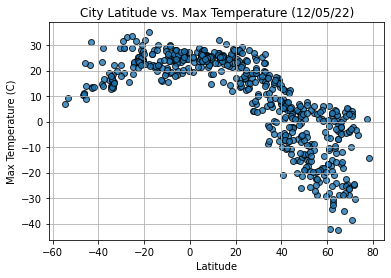

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

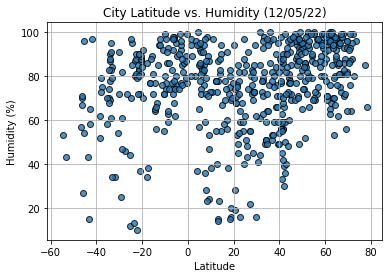

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

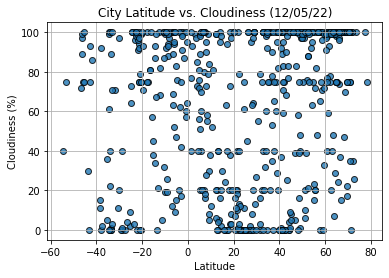

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

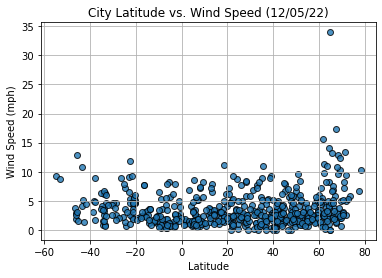

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tasiilaq,65.6145,-37.6368,-3.91,62,24,2.20,GL,1670279624
4,changji,44.0167,87.3167,-10.56,79,0,2.00,CN,1670279626
6,avallon,47.4833,3.9000,3.59,94,100,1.11,FR,1670279627
7,qaanaaq,77.4840,-69.3632,1.08,85,100,6.65,GL,1670279627
9,provideniya,64.3833,-173.3000,0.20,80,100,14.00,RU,1670279628


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,13.48,65,75,5.14,AU,1670279408
2,bredasdorp,-34.5322,20.0403,14.09,70,100,0.86,ZA,1670279625
3,rikitea,-23.1203,-134.9692,24.25,80,96,6.56,PF,1670279625
5,lukulu,-14.3707,23.2420,20.02,77,34,3.57,ZM,1670279626
8,arraial do cabo,-22.9661,-42.0278,23.32,87,100,9.06,BR,1670279628


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8214924016523123


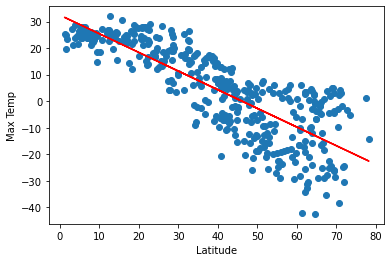

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,240))


The r-squared is: 0.5201588640310258


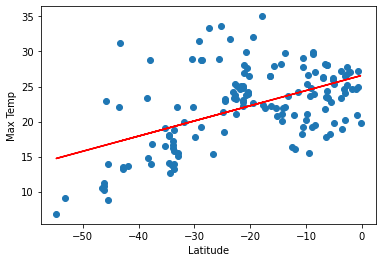

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,280))

**Discussion about the linear relationship:** The farther away from the equator, the lower the max temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.3204256649511789


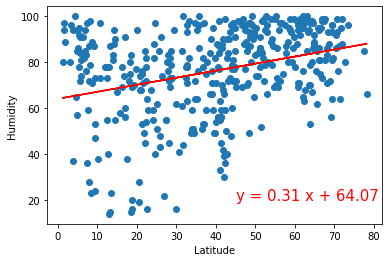

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (45,20))

The r-squared is: 0.38647523853433857


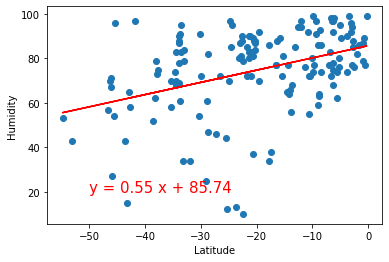

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-50,20))

**Discussion about the linear relationship:** There is not a strong relationship between humidity and latitude in either the northern or southern hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.27529580039339197


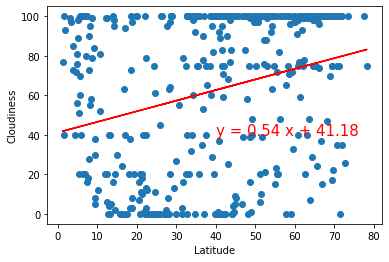

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,40))

The r-squared is: 0.2295398704242044


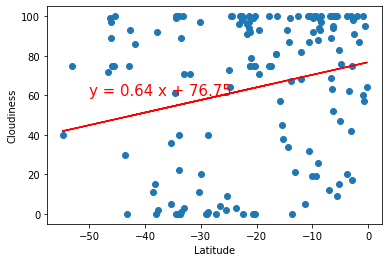

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-50,60))

**Discussion about the linear relationship:** There is not a correlation between cloudiness and latitude in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.2253881053773441


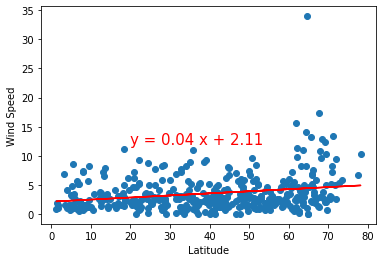

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (20,12))

The r-squared is: -0.32230854793748837


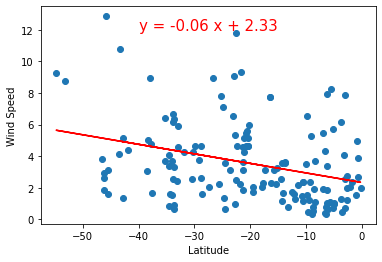

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-40,12))

**Discussion about the linear relationship:** There is no correlation between wind speed and latitude in either hemisphere. 